# Desafío Número 1
## Limpieza de la base de Properati

### Identificacion de la antiguedad de la propiedad

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Leo el archivo de properati
data = pd.read_csv("properati.csv")

In [3]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [4]:
# data.description[106272]

In [5]:
# data.title[40]

In [6]:
data_mask = data.description.notna()
data_con_descriptions =  data.loc[data_mask,:]
data_con_descriptions.shape

(121218, 26)

In [7]:
#Análisis de inmuebles a estrenar
a_estrenar = data_con_descriptions[data_con_descriptions['description'].str.contains('estrenar')]
mask_a_estrenar = data.index.isin(a_estrenar.index)

In [8]:
#Análisis de inmuebles en pozo
en_pozo = data_con_descriptions[data_con_descriptions['description'].str.contains('en pozo')]
mask_en_pozo = data.index.isin(en_pozo.index)

In [9]:
#Análisis de años de antiguedad en número
pattern_antiguedad = '(\d+)[\s]año'
pattern_antiguedad_regex = re.compile(pattern_antiguedad)
description_series = data_con_descriptions.description
resultado_antiguedad = description_series.apply(lambda x: pattern_antiguedad_regex.search(x))
resultado_antiguedad[resultado_antiguedad.notnull()]
encontradas_ant = resultado_antiguedad[resultado_antiguedad.notnull()].apply(lambda x: x.group(1))

In [10]:
encontradas_ant.shape

(4336,)

#### Es necesario revisar esta regex

In [11]:
# #Análisis de años de antiguedad en letras

# pattern_antiguedad_letras = '([a-zA-Z]*[\s]?[a-zA-Z]*[\s]?[a-zA-Z]*)[\s]año'
# pattern_antiguedad_letras_regex = re.compile(pattern_antiguedad_letras)
# description_series_letras = data_con_descriptions.description
# resultado_antiguedad_letras = description_series_letras.apply(lambda x: pattern_antiguedad_letras_regex.search(x))
# resultado_antiguedad_letras[resultado_antiguedad_letras.notnull()]
# encontradas_ant_letras = resultado_antiguedad_letras[resultado_antiguedad_letras.notnull()].apply(lambda x: x.group(1))


In [12]:
numeroaint = {'cero': 0, 'uno': 1, 'un': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8,
              'nueve': 9, 'diez': 10, 'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quince': 15, 'dieciseis': 16,
              'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19, 'veinte': 20, 'veintiun': 21, 'veintiuno': 21,
              'veintidos': 22, 'veintitres': 23, 'veinticuatro': 24, 'veinticinco': 25, 'veintiseis': 26, 'veintisiete': 27,
              'veintiocho': 28, 'veintinueve': 29, 'treinta': 30, 'treinta y un': 31, 'treinta y uno': 31, 'treinta y dos': 32, 
              'treinta y tres': 33, 'treinta y cuatro': 34, 'treinta y cinco': 35, 'treinta y seis': 36, 'trinta y siete': 37,
              'treinta y ocho': 38, 'treinta y nueve': 39, 'cuarenta': 40, 'cuarenta y uno': 41, 'cuarenta y un': 41, 
              'cuarenta y dos': 42, 'cuarenta y tres': 43, 'cuarenta y cuatro': 44, 'cuarenta y cinco': 45,
              'cuarenta y seis': 46, 'cuarenta y siete': 47, 'cuarenta y ocho': 48, 'cuarenta y nueve': 49, 'cincuenta': 50}
              
                       
def n2i(x):
    return numeroaint[x]


#### Creamos variable ant para identificar si es a estrenar, de pozo u otros

In [13]:
data.loc[mask_a_estrenar, 'ant'] = 'a_estrenar'
data.loc[mask_en_pozo, 'ant'] = 'en_pozo'
data.loc[data['ant'].isnull(),'ant'] = 'otros'
data.ant.value_counts()

otros         113692
a_estrenar      6682
en_pozo          846
Name: ant, dtype: int64

In [14]:
print(a_estrenar.state_name.value_counts(normalize = True))
data.state_name.value_counts(normalize = True)

Bs.As. G.B.A. Zona Norte        0.271265
Capital Federal                 0.262476
Santa Fe                        0.101147
Buenos Aires Costa Atlántica    0.084910
Bs.As. G.B.A. Zona Sur          0.084910
Bs.As. G.B.A. Zona Oeste        0.078802
Córdoba                         0.064204
Buenos Aires Interior           0.016535
Tucumán                         0.008193
Corrientes                      0.008044
Río Negro                       0.004469
Mendoza                         0.004320
Salta                           0.002830
Misiones                        0.002234
Entre Ríos                      0.002234
Neuquén                         0.001788
Chubut                          0.000894
La Pampa                        0.000298
Chaco                           0.000298
San Luis                        0.000149
Name: state_name, dtype: float64


Capital Federal                 0.266590
Bs.As. G.B.A. Zona Norte        0.210856
Bs.As. G.B.A. Zona Sur          0.115097
Córdoba                         0.099563
Santa Fe                        0.083914
Buenos Aires Costa Atlántica    0.082544
Bs.As. G.B.A. Zona Oeste        0.076902
Buenos Aires Interior           0.018900
Río Negro                       0.006666
Neuquén                         0.006047
Mendoza                         0.005618
Tucumán                         0.005560
Corrientes                      0.004809
Misiones                        0.003828
Entre Ríos                      0.003044
Salta                           0.002293
Chubut                          0.002137
San Luis                        0.002079
La Pampa                        0.001295
Formosa                         0.000536
Chaco                           0.000470
San Juan                        0.000330
Tierra Del Fuego                0.000256
Catamarca                       0.000223
Jujuy           

In [15]:
data.price.describe().apply(lambda x: format(x, 'f'))
a_estrenar.price.describe().apply(lambda x: format(x, 'f'))

count        5771.000000
mean       391171.337896
std        707647.657698
min         30000.000000
25%         99000.000000
50%        159000.000000
75%        340000.000000
max      13069000.000000
Name: price, dtype: object

In [17]:
data_amba = data[data['state_name'].isin(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Capital Federal',\
                                         'Bs.As. G.B.A. Zona Sur'])]
group_by_ant = data_amba.groupby(by=['state_name', 'ant']).mean()
data_count_prom = group_by_ant.iloc[:,4]/1000

In [23]:
group_by_ant

Unnamed: 0   geonames_id        lat  \
state_name               ant                                                 
Bs.As. G.B.A. Zona Norte a_estrenar  59614.537231  3.431312e+06 -34.434276   
                         en_pozo     70631.902597  3.430314e+06 -34.465500   
                         otros       57147.649218  3.433092e+06 -34.463074   
Bs.As. G.B.A. Zona Oeste a_estrenar  48002.967742  3.444321e+06 -34.635035   
                         en_pozo     33434.819672  3.430551e+06 -34.655152   
                         otros       45964.428212  3.454207e+06 -34.644877   
Bs.As. G.B.A. Zona Sur   a_estrenar  59172.635088  3.435233e+06 -34.828798   
                         en_pozo     65492.694444  3.432673e+06 -34.736441   
                         otros       67749.994305  3.433928e+06 -34.802170   
Capital Federal          a_estrenar  56642.649083  3.473488e+06 -34.599902   
                         en_pozo     70167.204918  3.431738e+06 -34.616530   
                         otros       61303.042409  3.532394e+06 -34.601745   

                                           lon         price  \
state_name               ant                                   
Bs.As. G.B.A. Zona Norte a_estrenar -58.676778  3.085041e+05   
                         en_pozo    -58.680146  1.994392e+06   
                         otros      -58.654429  4.587348e+05   
Bs.As. G.B.A. Zona Oeste a_estrenar -58.630999  1.454459e+05   
                         en_pozo    -58.744242  9.424028e+04   
                         otros      -58.637638  1.958781e+05   
Bs.As. G.B.A. Zona Sur   a_estrenar -58.220942  2.723867e+05   
                         en_pozo    -58.311433  3.350780e+05   
                         otros      -58.287310  2.412403e+05   
Capital Federal          a_estrenar -58.444895  2.322357e+05   
                         en_pozo    -58.435453  1.889475e+05   
                         otros      -58.435732  3.945115e+05   

                                     price_aprox_local_currency  \
state_name               ant                                      
Bs.As. G.B.A. Zona Norte a_estrenar                4.996848e+06   
                         en_pozo                   3.686336e+06   
                         otros                     5.792624e+06   
Bs.As. G.B.A. Zona Oeste a_estrenar                1.818962e+06   
                         en_pozo                   1.662823e+06   
                         otros                     3.035227e+06   
Bs.As. G.B.A. Zona Sur   a_estrenar                2.791169e+06   
                         en_pozo                   1.609760e+06   
                         otros                     3.536652e+06   
Capital Federal          a_estrenar                3.803207e+06   
                         en_pozo                   2.453605e+06   
                         otros                     4.844484e+06   

                                     price_aprox_usd  surface_total_in_m2  \
state_name               ant                                                
Bs.As. G.B.A. Zona Norte a_estrenar    283195.763878           203.942408   
                         en_pozo       208922.680584            88.909091   
                         otros         328296.296425           323.731193   
Bs.As. G.B.A. Zona Oeste a_estrenar    103089.482386           102.077181   
                         en_pozo        94240.281250            51.279070   
                         otros         172021.160063           273.215961   
Bs.As. G.B.A. Zona Sur   a_estrenar    158189.181706           110.916435   
                         en_pozo        91232.948889            47.913043   
                         otros         200439.365506           237.566969   
Capital Federal          a_estrenar    215546.290739            69.810028   
                         en_pozo       139057.778833            58.090634   
                         otros         274560.553333           122.875861   

                               

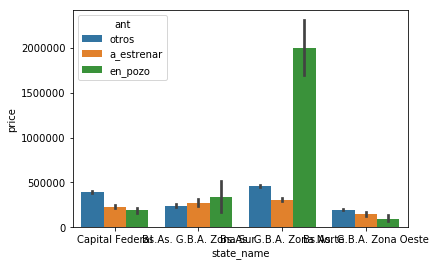